In [58]:
import os
import sys
import numpy as np
import pylab as pl
import astropy.units as u
import matplotlib.pyplot as plt

from   astropy.table import Table
import pubplot

In [2]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
from gama_limits import gama_field
from ros_tools import tile2rosette, calc_rosr

In [4]:
user = os.environ['USER']

gama = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold.fits'.format(user))
#gama

In [5]:
desi = Table.read('/cosma/home/durham/{}/data/desi_gold.fits'.format(user))
#desi

In [6]:
# read in for metadata
gama_G9 = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold_G9_ddp_n8_d0_0.fits'.format(user))

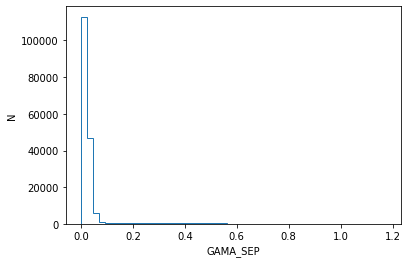

In [7]:
plt.hist(desi['GAMA_SEP'], histtype='step', bins=50)
plt.xlabel('GAMA_SEP')
plt.ylabel('N')
plt.show()

In [8]:
good_match = desi['GAMA_SEP'] < 1. * u.arcsec
np.mean(good_match)

0.1910088191008819

In [9]:
match = desi[good_match]
match

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GAMA_SEP
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,,,,,deg
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64
39627751493206196,8463.270686775446,221.26270114472453 .. -4.18207391665733,0.14756515752470148,1.0347126423482268e-05,0,7914,GALAXY,--,10,610.5001398026943,0,179.00684662808823,-1.5854359049019477,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.39934897699621286,516,9010,322444,180,SER,9.510991,17.955027,29.486227,201.25485,99.9256,20.759195,0,0,--,0.0,0.0,0.0,0.0,1791m015,0.02626748,29.401152,17.249445,1.8708502,0.4161666,2.0745454,3.9163656,6.431561,2.0752914,3.91767,6.432513,1.3576496,2.4701838,0.00839696,-0.72231585,S,102100,9,1152921504606846976,131074,0,0,0,0,0,179.00684662808823,-1.5854359049019477,1,306.1762,1,1,-0.001,0.001,0.001,0.001,179.006842805758,0.0,-1.5854394798393572,0.0,0.72444165,185109,587725041702076895,179.00689353,-1.58544949,19.392159,0.14748,4,G12_Y2_044_188,6,20.969,19.949112,19.285656,19.01996,18.83842,492.77254152440804,38.46323249946821,G12,429.12024030335505,-11.045190288140558,-12.31189915906983,4.881250127241795e-05
39627751489013608,9649.093964904547,904.0885701427658 .. 45.899310840071,0.14290528242406353,1.1196772547171301e-05,0,7890,GALAXY,--,10,2951.0636972486973,0,178.8316242558849,-1.4807740906426945,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.8082330224368068,516,9010,322443,1896,SER,96.03242,193.96255,347.49557,33.16658,16.360119,3.062924,0,0,--,0.0,0.0,0.0,0.0,1788m015,0.026511215,279.6854,222.62694,0.47903174,0.15305638,10.25385,20.710327,37.103798,10.254372,20.710846,37.104095,3.6561062,5.233705,0.09695543,0.26879966,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.8316242558849,-1.4807740906426945,1,306.1762,1,1,0.0,0.0,-0.003,0.003,178.83162390567188,0.0,-1.4807629549674806,0.0,0.7251477,185046,587725041702011010,178.83164024,-1.48076223,17.072691,0.14295,5,371704239182866432,6,18.812923,17.498837,16.812054,16.38272,16.084978,476.1963793333473,38.38893044503849,G12,416.3152049665218,-11.989964361773072,-11.183903677489313,1.9899652496315195e-05
39627751489013565,8576.984808493406,732.433116304454 .. 31.091475148718626,0.16499737039919948,3.415068247628022e-0

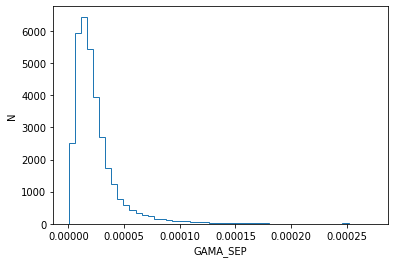

In [10]:
plt.hist(match['GAMA_SEP'], histtype='step', bins=50)
plt.xlabel('GAMA_SEP')
plt.ylabel('N')
plt.show()

Text(0, 0.5, 'Declination [deg.]')

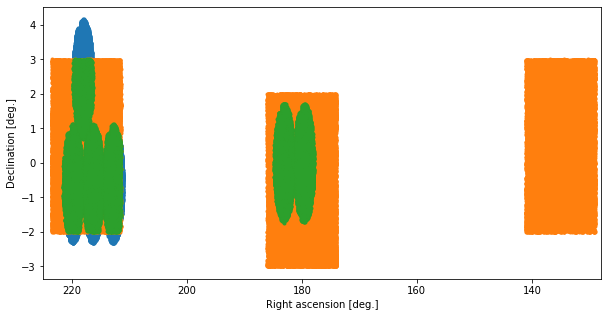

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

pl.plot(desi['TARGET_RA'],   desi['TARGET_DEC'], marker='.', lw=0.0)

pl.plot(gama['RA'],   gama['DEC'], marker='.', lw=0.0)
pl.plot(match['RA'], match['DEC'], marker='.', lw=0.0)

pl.xlim(225., 128.)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

In [12]:
print(len(gama), len(desi), len(match))

113687 176662 33744


In [13]:
ddp1_min = gama_G9.meta['DDP1_ZMIN']
ddp1_max = gama_G9.meta['DDP1_ZMAX']
ddp2_min = gama_G9.meta['DDP2_ZMIN']
ddp2_max = gama_G9.meta['DDP2_ZMAX']
ddp3_min = gama_G9.meta['DDP3_ZMIN']
ddp3_max = gama_G9.meta['DDP3_ZMAX']

# note: selection cut on GAMA redshifts, not DESI
match_ddp1 = match[match['ZGAMA'] > ddp1_min]
match_ddp1 = match_ddp1[match_ddp1['ZGAMA'] < ddp1_max]

match_ddp2 = match[match['ZGAMA'] > ddp2_min]
match_ddp2 = match_ddp2[match_ddp2['ZGAMA'] < ddp2_max]

match_ddp3 = match[match['ZGAMA'] > ddp3_min]
match_ddp3 = match_ddp3[match_ddp3['ZGAMA'] < ddp3_max]

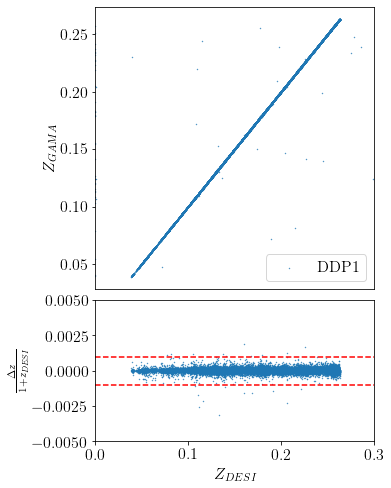

In [65]:
fig, ax = plt.subplots(2,1, figsize=(5, 8), sharex=True, gridspec_kw = {'height_ratios': [2, 1], 'hspace':0.05})

ax[0].scatter(match_ddp1['Z'], match_ddp1['ZGAMA'], s=0.15, label='DDP1')
ax[0].set_xlabel(r'$Z_{DESI}$')
ax[0].set_ylabel(r'$Z_{GAMA}$')
ax[0].axes.get_xaxis().set_visible(False)

ax[1].scatter(match_ddp1['Z'], (match_ddp1['ZGAMA'] - match_ddp1['Z']) / (1+match_ddp1['Z']), s=0.15)
ax[1].set_xlabel(r'$Z_{DESI}$')
ax[1].set_ylabel(r'$\frac{\Delta z}{1+z_{DESI}} $')
ax[1].set_ylim(-0.005, 0.005)
ax[1].set_xlim(0.00, 0.3)

ax[1].axhline(y = 0.001, color = 'r', linestyle = '--')
ax[1].axhline(y = -0.001, color = 'r', linestyle = '--')

ax[0].legend()

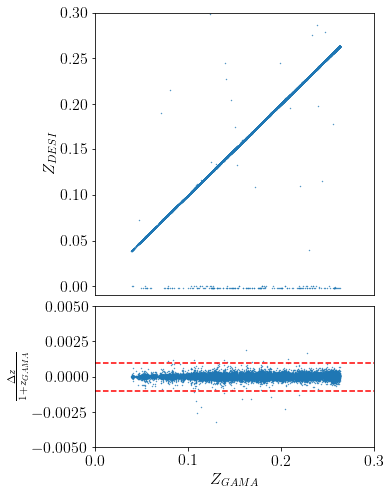

In [60]:
fig, ax = plt.subplots(2,1, figsize=(5, 8), sharex=True, gridspec_kw = {'height_ratios': [2, 1], 'hspace':0.05})

ax[0].scatter(match_ddp1['ZGAMA'], match_ddp1['Z'], s=0.15, label='DDP1')
ax[0].set_xlabel(r'$Z_{GAMA}$')
ax[0].set_ylabel(r'$Z_{DESI}$')
ax[0].axes.get_xaxis().set_visible(False)

ax[1].scatter(match_ddp1['ZGAMA'], (match_ddp1['ZGAMA'] - match_ddp1['Z']) / (1+match_ddp1['ZGAMA']), s=0.15)
ax[1].set_xlabel(r'$Z_{GAMA}$')
ax[1].set_ylabel(r'$\frac{\Delta z}{1+z_{GAMA}} $')

#ax[1].set_ylim(-0.01, 0.01)

ax[0].set_xlim(0, 0.3)
ax[1].set_xlim(0, 0.3)

ax[0].set_ylim(-0.01, 0.3)
ax[1].set_ylim(-0.005, 0.005)

ax[1].axhline(y = 0.001, color = 'r', linestyle = '--')
ax[1].axhline(y = -0.001, color = 'r', linestyle = '--')


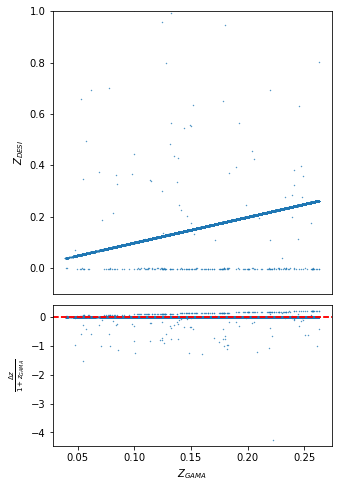

In [56]:
fig, ax = plt.subplots(2,1, figsize=(5, 8), sharex=True, gridspec_kw = {'height_ratios': [2, 1], 'hspace':0.05})

ax[0].scatter(match_ddp1['ZGAMA'], match_ddp1['Z'], s=0.15, label='DDP1')
ax[0].set_xlabel(r'$Z_{GAMA}$')
ax[0].set_ylabel(r'$Z_{DESI}$')
ax[0].axes.get_xaxis().set_visible(False)

ax[1].scatter(match_ddp1['ZGAMA'], (match_ddp1['ZGAMA'] - match_ddp1['Z']) / (1+match_ddp1['ZGAMA']), s=0.15)
ax[1].set_xlabel(r'$Z_{GAMA}$')
ax[1].set_ylabel(r'$\frac{\Delta z}{1+z_{GAMA}} $')

#ax[1].set_ylim(-0.01, 0.01)

ax[0].set_ylim(-0.1, 1)

ax[1].axhline(y = 0.001, color = 'r', linestyle = '--')
ax[1].axhline(y = -0.001, color = 'r', linestyle = '--')


In [16]:
z_ratio = (match_ddp1['ZGAMA'] - match_ddp1['Z']) / (1+match_ddp1['ZGAMA'])

In [17]:
print(len(z_ratio), len(z_ratio[z_ratio > 0.003333]))

33741 192


In [18]:
cat_frac = len(z_ratio[z_ratio < 0.003333])/len(z_ratio)
print(cat_frac *100)

99.43095936694229


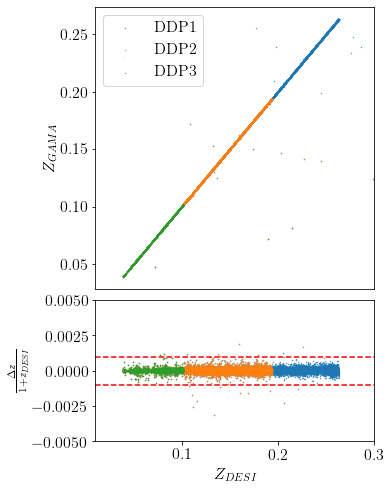

In [66]:
fig, ax = plt.subplots(2,1, figsize=(5, 8), sharex=True, gridspec_kw = {'height_ratios': [2, 1], 'hspace':0.05})

ax[0].scatter(match_ddp1['Z'], match_ddp1['ZGAMA'], s=0.15, label='DDP1')
ax[0].scatter(match_ddp2['Z'], match_ddp2['ZGAMA'], s=0.15, label='DDP2')
ax[0].scatter(match_ddp3['Z'], match_ddp3['ZGAMA'], s=0.15, label='DDP3')
ax[0].set_xlabel(r'$Z_{DESI}$')
ax[0].set_ylabel(r'$Z_{GAMA}$')
ax[0].axes.get_xaxis().set_visible(False)

ax[1].scatter(match_ddp1['Z'], (match_ddp1['ZGAMA'] - match_ddp1['Z']) / (1+match_ddp1['Z']), s=0.15)
ax[1].scatter(match_ddp2['Z'], (match_ddp2['ZGAMA'] - match_ddp2['Z']) / (1+match_ddp2['Z']), s=0.15)
ax[1].scatter(match_ddp3['Z'], (match_ddp3['ZGAMA'] - match_ddp3['Z']) / (1+match_ddp3['Z']), s=0.15)

ax[1].set_xlabel(r'$Z_{DESI}$')
ax[1].set_ylabel(r'$\frac{\Delta z}{1+z_{DESI}} $')
ax[1].set_ylim(-0.005, 0.005)
ax[1].set_xlim(0.01, 0.3)

ax[1].axhline(y = 0.001, color = 'r', linestyle = '--')
ax[1].axhline(y = -0.001, color = 'r', linestyle = '--')

ax[0].legend()

In [22]:
desi['GAMA_FIELD'] = gama_field(desi['TARGET_RA'], desi['TARGET_DEC'])
match['GAMA_FIELD'] = gama_field(match['TARGET_RA'], match['TARGET_DEC'])

In [23]:
match

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GAMA_SEP,GAMA_FIELD
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,,,,,deg,
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,str4
39627751493206196,8463.270686775446,221.26270114472453 .. -4.18207391665733,0.14756515752470148,1.0347126423482268e-05,0,7914,GALAXY,--,10,610.5001398026943,0,179.00684662808823,-1.5854359049019477,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.39934897699621286,516,9010,322444,180,SER,9.510991,17.955027,29.486227,201.25485,99.9256,20.759195,0,0,--,0.0,0.0,0.0,0.0,1791m015,0.02626748,29.401152,17.249445,1.8708502,0.4161666,2.0745454,3.9163656,6.431561,2.0752914,3.91767,6.432513,1.3576496,2.4701838,0.00839696,-0.72231585,S,102100,9,1152921504606846976,131074,0,0,0,0,0,179.00684662808823,-1.5854359049019477,1,306.1762,1,1,-0.001,0.001,0.001,0.001,179.006842805758,0.0,-1.5854394798393572,0.0,0.72444165,185109,587725041702076895,179.00689353,-1.58544949,19.392159,0.14748,4,G12_Y2_044_188,6,20.969,19.949112,19.285656,19.01996,18.83842,492.77254152440804,38.46323249946821,G12,429.12024030335505,-11.045190288140558,-12.31189915906983,4.881250127241795e-05,G12
39627751489013608,9649.093964904547,904.0885701427658 .. 45.899310840071,0.14290528242406353,1.1196772547171301e-05,0,7890,GALAXY,--,10,2951.0636972486973,0,178.8316242558849,-1.4807740906426945,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.8082330224368068,516,9010,322443,1896,SER,96.03242,193.96255,347.49557,33.16658,16.360119,3.062924,0,0,--,0.0,0.0,0.0,0.0,1788m015,0.026511215,279.6854,222.62694,0.47903174,0.15305638,10.25385,20.710327,37.103798,10.254372,20.710846,37.104095,3.6561062,5.233705,0.09695543,0.26879966,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.8316242558849,-1.4807740906426945,1,306.1762,1,1,0.0,0.0,-0.003,0.003,178.83162390567188,0.0,-1.4807629549674806,0.0,0.7251477,185046,587725041702011010,178.83164024,-1.48076223,17.072691,0.14295,5,371704239182866432,6,18.812923,17.498837,16.812054,16.38272,16.084978,476.1963793333473,38.38893044503849,G12,416.3152049665218,-11.989964361773072,-11.183903677489313,1.9899652496315195e-05,G12
39627751489013565,8576.984808493406,732.433116304454 .. 31.091475148718626,0.1649973703991

In [32]:
#calc_rosr(1, desi[0]['RA'], desi[0]['DEC'])

1.6906962459111714

In [43]:
desi

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GAMA_SEP,GAMA_FIELD,ROS_ID
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,,,,,deg,,
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,str4,int64
39627751489016708,8978.298949219286,649.6114366625287 .. -21.794763807531762,0.28889633337721987,4.945844833026809e-05,0,7900,GALAXY,--,10,311.1272517181933,0,178.98596856089202,-1.55865290641474,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.8407840645505351,516,9010,322443,4996,SER,5.3268905,21.659086,44.19788,217.58514,131.49124,27.183735,0,3602245146248298496,G2,20.669582,20.274534,18.63297,0.0,1788m015,0.02657007,55.936947,37.892376,1.8722614,0.4611639,2.3634233,9.609657,19.609621,2.3634233,9.609657,19.609621,3.0725806,0.8982461,-0.35175312,-0.3856709,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.98596856089202,-1.55865290641474,1,306.1762,1,1,-0.003,0.003,0.004,0.004,178.98595719101013,0.0,-1.5586673477788957,0.0,0.74884486,185097,587725041702076632,178.9933246,-1.57812922,18.002394,0.14827,4,2dF299026,6,19.590616,18.437204,17.907755,17.57333,17.354822,495.67220641352463,38.47597283802337,G12,431.3473177595405,-11.204735873185138,-12.3206955424586,0.020818202744412463,G12,1
39627751493206196,8463.270686775446,221.26270114472453 .. -4.18207391665733,0.14756515752470148,1.0347126423482268e-05,0,7914,GALAXY,--,10,610.5001398026943,0,179.00684662808823,-1.5854359049019477,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.39934897699621286,516,9010,322444,180,SER,9.510991,17.955027,29.486227,201.25485,99.9256,20.759195,0,0,--,0.0,0.0,0.0,0.0,1791m015,0.02626748,29.401152,17.249445,1.8708502,0.4161666,2.0745454,3.9163656,6.431561,2.0752914,3.91767,6.432513,1.3576496,2.4701838,0.00839696,-0.72231585,S,102100,9,1152921504606846976,131074,0,0,0,0,0,179.00684662808823,-1.5854359049019477,1,306.1762,1,1,-0.001,0.001,0.001,0.001,179.006842805758,0.0,-1.5854394798393572,0.0,0.72444165,185109,587725041702076895,179.00689353,-1.58544949,19.392159,0.14748,4,G12_Y2_044_188,6,20.969,19.949112,19.285656,19.01996,18.83842,492.77254152440804,38.46323249946821,G12,429.12024030335505,-11.045190288140558,-12.31189915906983,4.881250127241795e-05,G12,1
39627757528809723,8585.26397619769,604.59440

In [42]:
desi['ROS_ID'] = tile2rosette(desi['TILEID'])

KeyError: 'TILEID'

In [39]:
desi['ROS_R'] = calc_rosr(desi['ROS_ID'], desi['RA'], desi['DEC'])

TypeError: unhashable type: 'Column'

# Done.

In [41]:
sorted(desi.dtype.names)

['BGS_TARGET',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CATAID',
 'CHI2',
 'COADD_EXPTIME',
 'COADD_FIBERSTATUS',
 'COADD_NUMEXP',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE',
 'COEFF',
 'DEC',
 'DELTACHI2',
 'DESI_TARGET',
 'DISTMOD',
 'EBV',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FIELD',
 'FLUX_G',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_Z',
 'FLUX_R',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_Z',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAMA_FIELD',
 'GAMA_SEP',
 'GMAG_DRED_SDSS',
 'IMAG_DRED_SDSS',
 'LUMDIST',
 'MASKBITS',
 'MEAN_DELTA_X',
 'MEAN_DELTA_Y',
 'MEAN_FIBER_DEC',
 'MEAN_FIBER_RA',
 'MEAN_PSF_TO_FIBER_SPECFLUX',
 'MORPHTYPE',
 'MWS_TARGET',
 'NCOEFF',
 'NPIXELS',
 'NQ',
 'NUMOBS_INIT',
 'OBJID',
 'OBJTYPE',
 'OBSCONDITIONS',
 'PARALLAX',
 'PHOTSYS',
 'PLATE_DEC',
 'PLATE_R

In [46]:
desi['RMAG'] = 22.5 - 2.5*np.log10(desi['FLUX_R'])

desi['RMAG_DRED'] = desi['RMAG'] / mw_

/tmp/ipykernel_243563/1738615522.py:1: RuntimeWarning: divide by zero encountered in log10
  desi['RMAG'] = 22.5 - 2.5*np.log10(desi['FLUX_R'])
/tmp/ipykernel_243563/1738615522.py:1: RuntimeWarning: invalid value encountered in log10
  desi['RMAG'] = 22.5 - 2.5*np.log10(desi['FLUX_R'])
